#### 模式数据预处理

In [37]:
import os
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from back_tool import processing_data


print(os.getcwd())

/Users/lyong/Desktop/elec-big-data-compete


####  1. 导入数据
注意： 本地导入的是小数据集，只包含100条训练样本，100条测试样本


In [38]:

processing_data('模式识别数据集', 'train', n=100) #n表示导入的样本数
processing_data('模式识别数据集', 'validation', n=100)
df_train = pd.read_pickle('./模式识别数据集/train_data.pkl')
df_val = pd.read_pickle('./模式识别数据集/validation_data.pkl')

##### 1. 绘制时序长度直方图
df_train的行数为样本总数，记第i行为X[i]则
'时序长度' = X[i] / 5， 如果将X[i]转换为(5, X[i]/5)，从左到右各列分别表示:TOA(ns),A,B,C,D.

Index(['X_seqs', 'y_targets'], dtype='object')


Text(0.5, 1.0, 'Train')

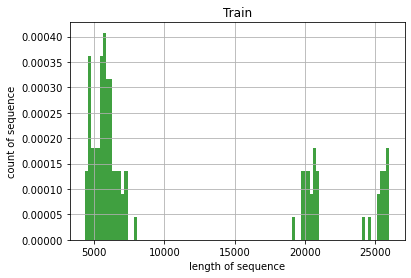

In [39]:
print(df_train.columns)
df_train['seq_length'] = df_train['X_seqs'].apply(lambda x: len(x)/5)
plt.hist(df_train['seq_length'],100, facecolor="g" ,density=True, alpha=0.75)
plt.xlabel('length of sequence')
plt.ylabel('count of sequence')
plt.grid(True)
plt.title('Train')

In [51]:
df_count_train = df_train.y_targets.value_counts()
df_count_val = df_val.y_targets.value_counts()
print('train:\n',df_count_train/sum(df_count_train))
print('\nval:\n',df_count_val/sum(df_count_val))



train:
 TAS    0.343137
TWS    0.333333
STT    0.166667
MTT    0.156863
Name: y_targets, dtype: float64

val:
 TAS    0.372549
TWS    0.352941
STT    0.147059
MTT    0.127451
Name: y_targets, dtype: float64


##### 3. 绘制波形图

In [40]:
# i = 5
def plot_wave(df, i):
    # df = df_train
    X, y = df['X_seqs'][i], df['y_targets'][i]
    X = np.array(X).reshape(-1, 5)
    scaler = MinMaxScaler(feature_range=(0, 100))
    X = scaler.fit_transform(X)
    # print(X)
    y_title = ['A','B','C','D']
    fig, axs = plt.subplots(4,1)
    fig.set_size_inches(20, 12)

    # X = X[:100, :]
    # diffX = np.diff(X, axis=0)
    # print(diffX[:,0].mean(), diffX[:,0].max(), diffX[:,0].min())
    print(f'target: {y}')
    for k in range(1, X.shape[1]):
        axs[k-1].scatter(X[:,0], X[:,k], s=0.5)
        if k == 4:
            axs[k-1].set_xlabel('Time(TOA(ns))')
        axs[k-1].set_ylabel(f'feature_{y_title[k-1]}')
        if k == 1:
            axs[k-1].set_title(f'target: {y}')
    plt.show()

In [30]:
for idx, y_target in enumerate(list(df_train.y_targets)):
    print(idx, y_target)

0 MTT
1 MTT
2 MTT
3 MTT
4 MTT
5 MTT
6 MTT
7 MTT
8 MTT
9 MTT
10 MTT
11 MTT
12 MTT
13 MTT
14 STT
15 STT
16 STT
17 STT
18 STT
19 STT
20 STT
21 STT
22 STT
23 STT
24 TAS
25 TAS
26 TAS
27 TAS
28 TAS
29 TAS
30 TAS
31 TAS
32 TAS
33 TAS
34 TAS
35 TAS
36 TAS
37 TAS
38 TAS
39 TAS
40 TAS
41 TAS
42 TAS
43 TAS
44 TAS
45 TAS
46 TAS
47 TAS
48 TAS
49 TAS
50 TAS
51 TAS
52 TAS
53 TAS
54 TAS
55 TAS
56 TAS
57 TAS
58 TAS
59 TAS
60 TAS
61 TAS
62 TAS
63 TWS
64 TWS
65 TWS
66 TWS
67 TWS
68 TWS
69 TWS
70 TWS
71 TWS
72 TWS
73 TWS
74 TWS
75 TWS
76 TWS
77 TWS
78 TWS
79 TWS
80 TWS
81 TWS
82 TWS
83 TWS
84 TWS
85 TWS
86 TWS
87 TWS
88 TWS
89 TWS
90 TWS
91 TWS
92 TWS
93 TWS
94 TWS
95 TWS
96 TWS
97 TWS
98 TWS
99 TWS
100 TWS
101 TWS


target: MTT


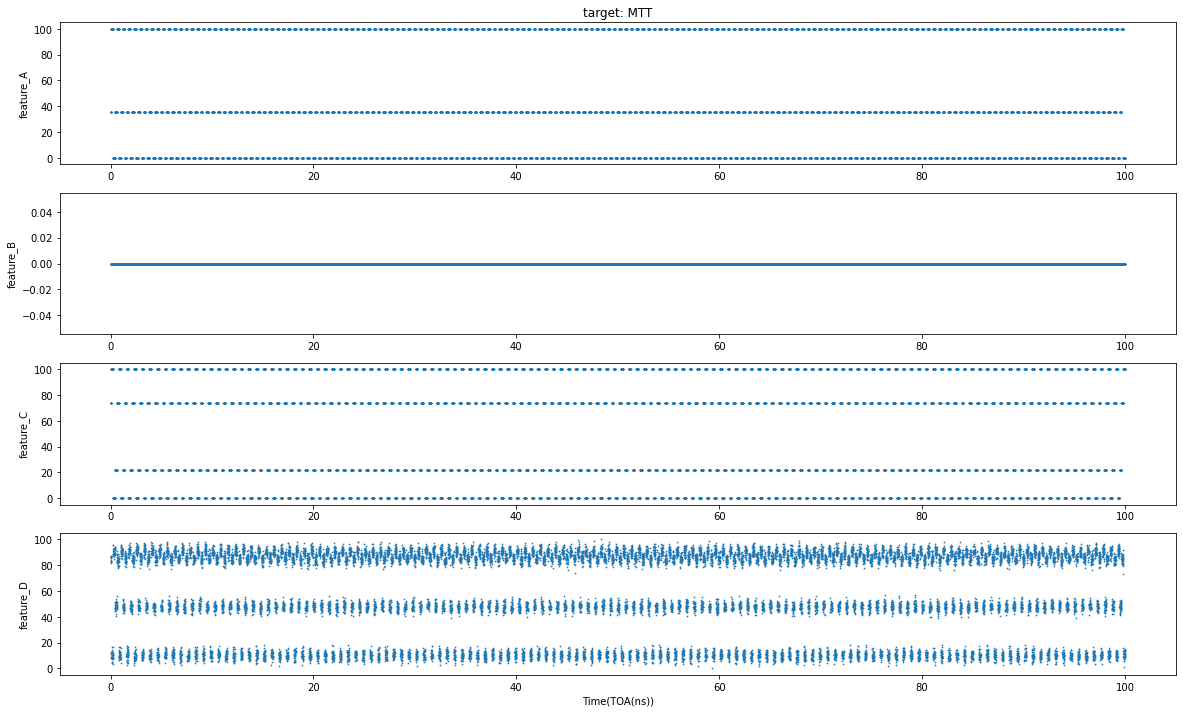

target: STT


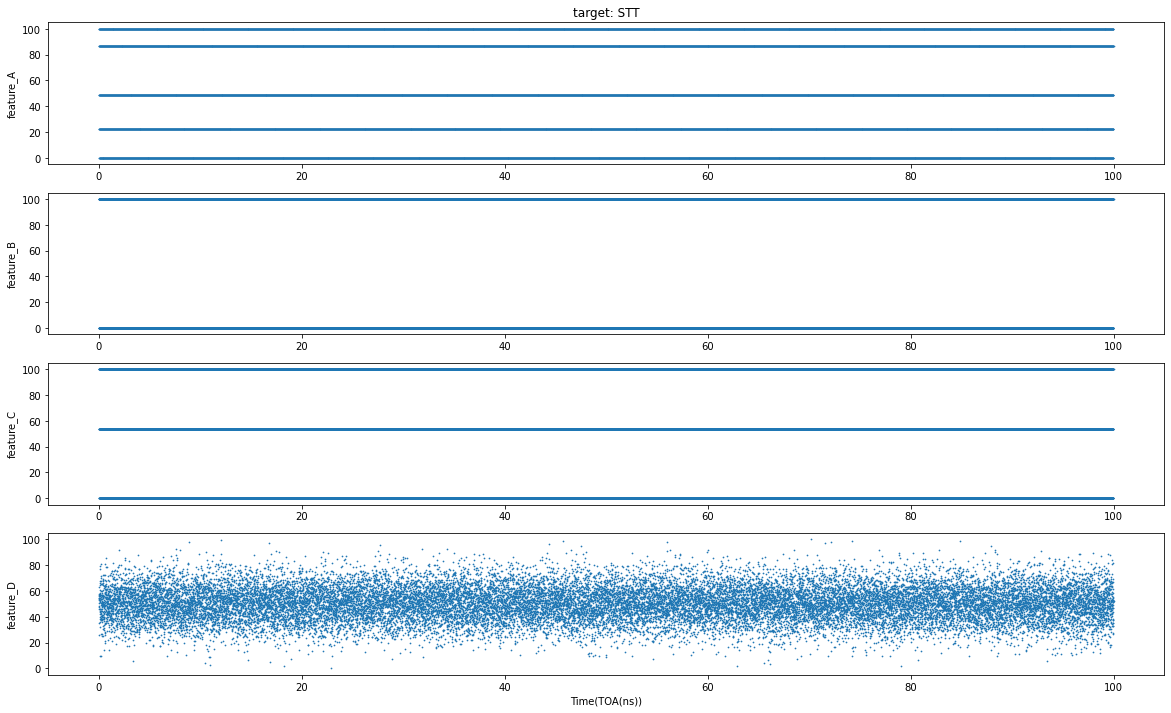

target: TAS


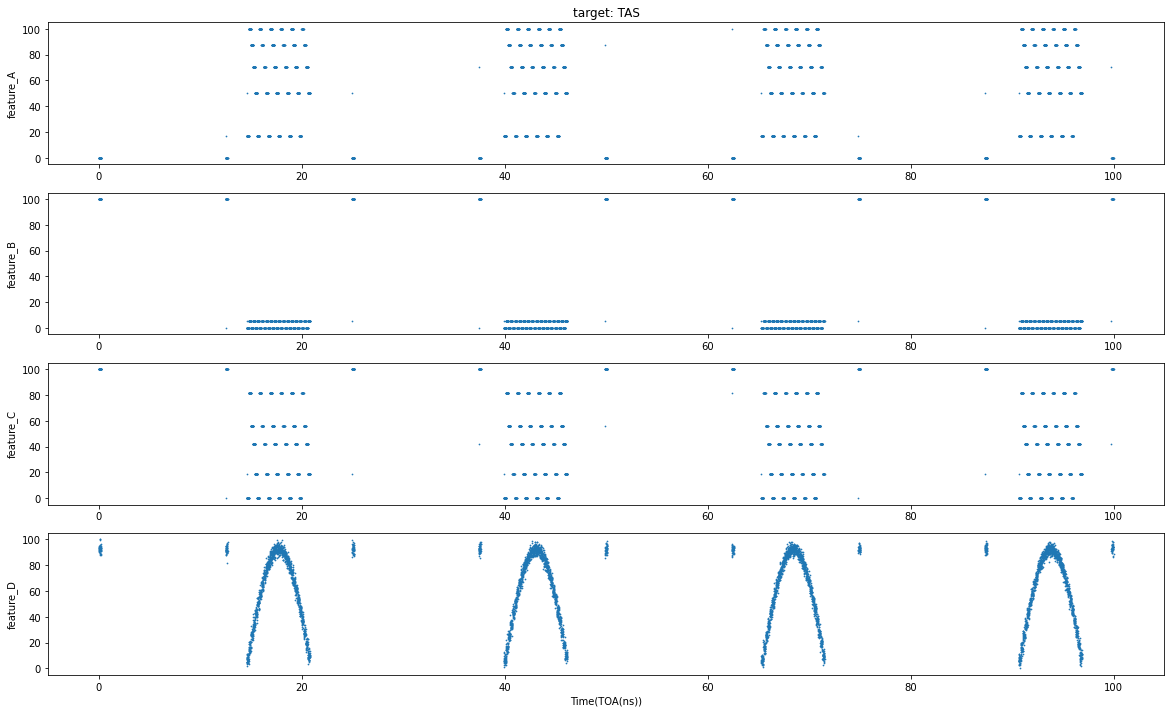

target: TWS


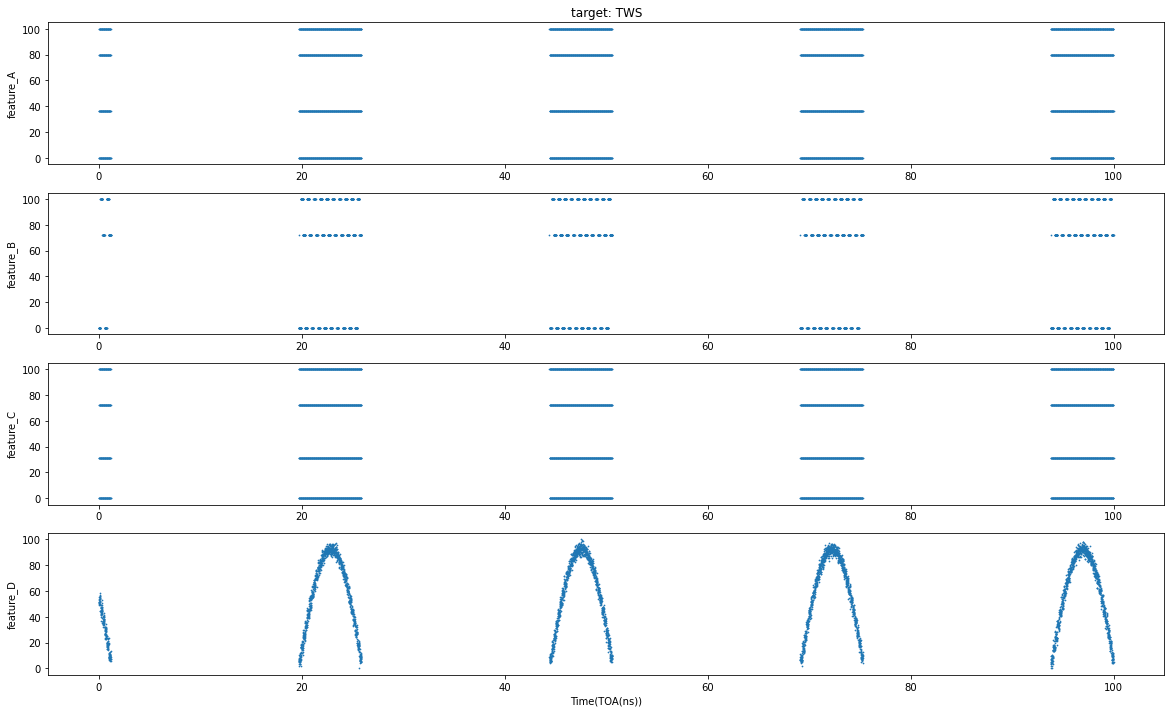

In [42]:
plot_wave(df_train, 2)
plot_wave(df_train, 20)
plot_wave(df_train, 40)
plot_wave(df_train, 95)